# Medical Insurance Cost Prediction

This notebook provides a solution to predict medical insurance costs based on demographic and lifestyle features using various machine learning models.

## Importing Necessary Libraries

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

## Loading the Dataset

Load the dataset to inspect its structure.

In [17]:
data = pd.read_csv('/content/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Data Overview

Basic information about the dataset and check for missing values.

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [19]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [20]:
data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


## Exploratory Data Analysis

Visualize the distribution of charges and relationships between other features and charges.

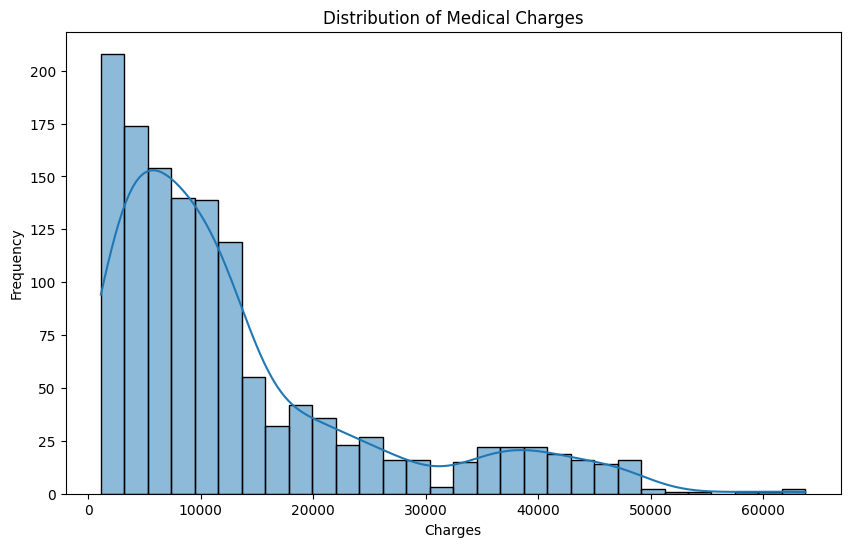

In [21]:
# Distribution of medical charges
plt.figure(figsize=(10,6))
sns.histplot(data['charges'], kde=True)
plt.title('Distribution of Medical Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

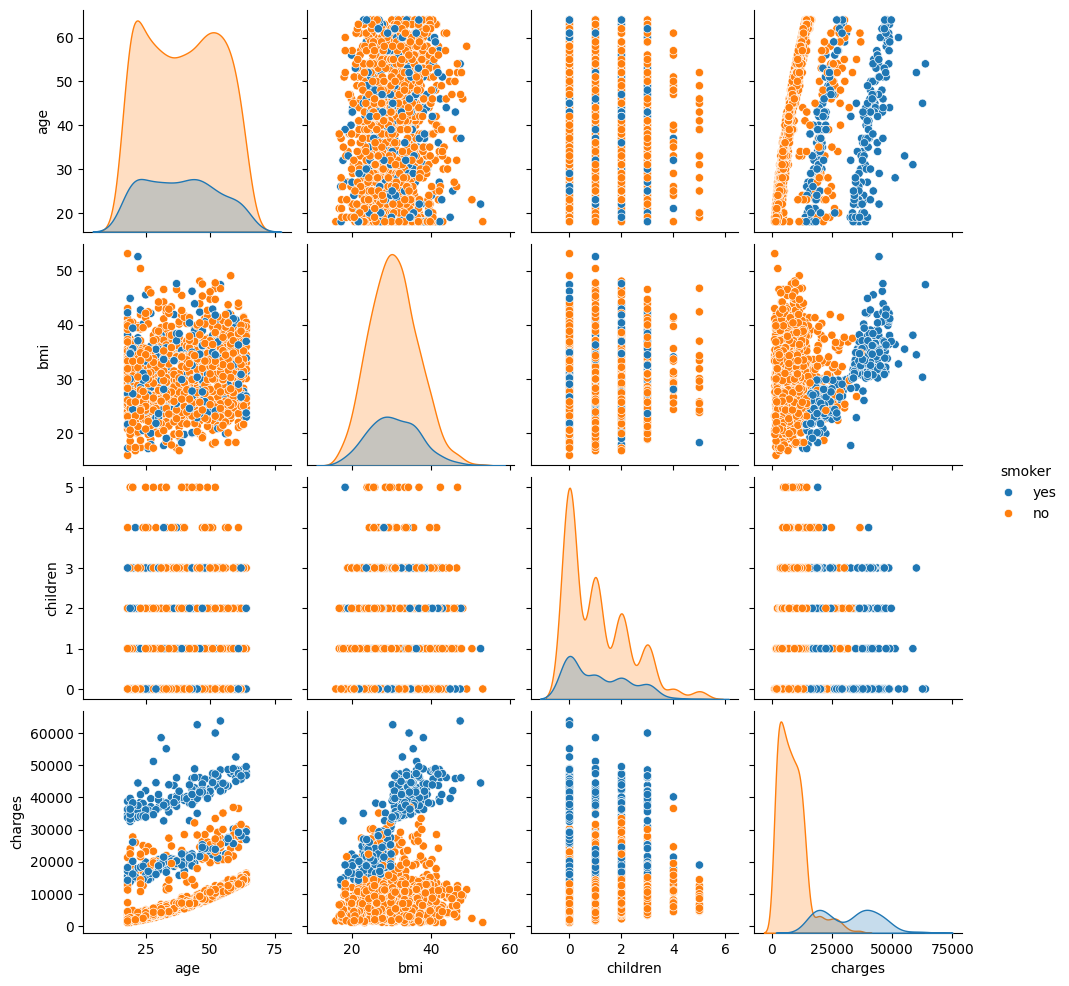

In [22]:
# Pairplot to explore relationships with smoker as hue
sns.pairplot(data, hue='smoker', diag_kind='kde')
plt.show()

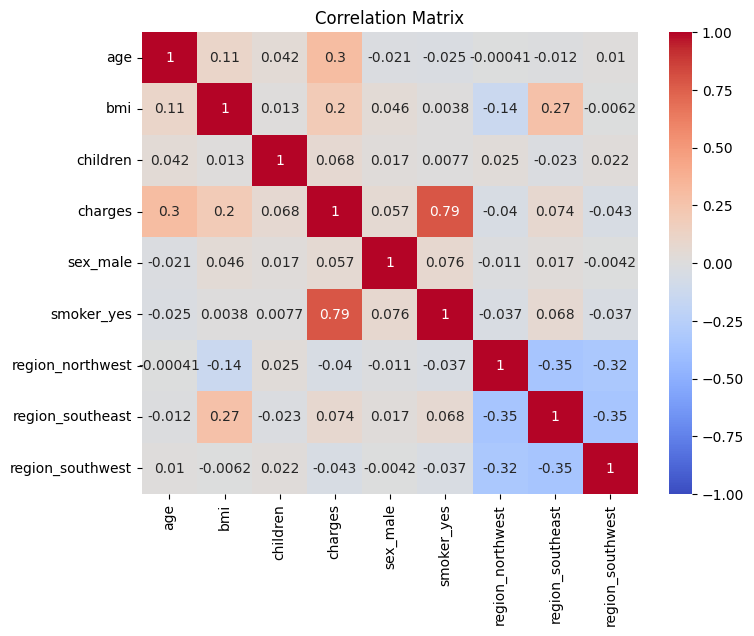

In [23]:
# Convert categorical features to numeric using one-hot encoding
data_encoded = pd.get_dummies(data, drop_first=True)

# Correlation heatmap with encoded data
plt.figure(figsize=(8, 6))
sns.heatmap(data_encoded.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()


## Data Preprocessing

Convert categorical variables to numeric using one-hot encoding.

In [24]:
# Convert categorical features to numeric using one-hot encoding
data_encoded = pd.get_dummies(data, drop_first=True)

data_encoded.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


## Model Training and Evaluation

Train and evaluate three models: Linear Regression, Random Forest, and Gradient Boosting Regressor.

In [25]:
# Define features and target variable
X = data_encoded.drop('charges', axis=1)
y = data_encoded['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# Train and evaluate each model
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    results[model_name] = {'MAE': mae, 'MSE': mse}

# Display results
results_df = pd.DataFrame(results).T
results_df

,MAE,MSE
Linear Regression,4181.194474,3.359692e+07
Random Forest,2550.078471,2.094252e+07
Gradient Boosting,2443.483262,1.874518e+07


from matplotlib import pyplot as plt
results_df['MAE'].plot(kind='hist', bins=20, title='MAE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df['MSE'].plot(kind='hist', bins=20, title='MSE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df.plot(kind='scatter', x='MAE', y='MSE', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df['MAE'].plot(kind='line', figsize=(8, 4), title='MAE')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
results_df['MSE'].plot(kind='line', figsize=(8, 4), title='MSE')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# prompt: Using dataframe results_df: pie

import matplotlib.pyplot as plt

# Assuming you want a pie chart of MAE values
plt.pie(results_df['MAE'], labels=results_df['MAE'], autopct='%1.1f%%')
plt.title('MAE Values')
plt.show()

## Conclusion

The Gradient Boosting model achieved the best performance among the three models tested, showing the lowest Mean Absolute Error (MAE) and Mean Squared Error (MSE). This indicates that it was the most accurate model for predicting medical insurance costs based on the available dataset.

### Potential Improvements
To further enhance the model's accuracy, consider the following steps:

- **Hyperparameter Tuning**: Experiment with different hyperparameters for the Gradient Boosting model, such as learning rate, number of estimators, and maximum depth. Fine-tuning these parameters can help improve model performance.

- **Add More Features**: Including additional relevant data could enhance predictions. For instance, features like health conditions, exercise habits, or medical history could help the model capture more variation in insurance costs.

- **Feature Engineering**: Create new features or transformations from existing ones to reveal complex patterns in the data. For example, categorizing BMI into different ranges or calculating interaction terms between features might yield better results.

This analysis provides a foundation for understanding the impact of demographic and lifestyle factors on insurance costs, with the Gradient Boosting model offering a solid starting point for further refinement.